In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ast
import tikzplotlib
from common import analyse_results, expand_sparsity_explanation_rate, calculate_similarity_scores, heatmap, annotate_heatmap

In [2]:
sns.set_theme(style='white', palette='deep')
sns.set_context('paper', font_scale=2)

# Analyze Results for the Wikipedia Dataset

## 1. Data Loading

### 1.1. Load the results

In [3]:
# Load results for CoDy
cody_random = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_random.parquet')
cody_recent = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_recent.parquet')
cody_closest = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_closest.parquet')
cody_1_best = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_1-best.parquet')

cody_random_w = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_random_wrong_only.parquet')
cody_recent_w = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_recent_wrong_only.parquet')
cody_closest_w = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_closest_wrong_only.parquet')
cody_1_best_w = pd.read_parquet('../results/wikipedia/cody/results_wikipedia_cftgnnexplainer_1-best_wrong_only.parquet')

In [4]:
# Load results for Greedy Baseline
greedy_random = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_random.parquet')
greedy_recent = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_recent.parquet')
greedy_closest = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_closest.parquet')
greedy_1_best = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_1-best.parquet')

greedy_random_w = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_random_wrong_only.parquet')
greedy_recent_w = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_recent_wrong_only.parquet')
greedy_closest_w = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_closest_wrong_only.parquet')
greedy_1_best_w = pd.read_parquet('../results/wikipedia/greedy/results_wikipedia_greedy_1-best_wrong_only.parquet')

In [5]:
# Load resutls from TGNNExplainer
tgnnex = pd.read_parquet('../results/wikipedia/tgnnexplainer/results_wikipedia_tgnnexplainer.parquet')

tgnnex_w = pd.read_parquet('../results/wikipedia/tgnnexplainer/results_wikipedia_tgnnexplainer_wrong_only.parquet')

### 1.2. Run analysis

In [6]:
# Analyze results for CoDy
results_cody_random = analyse_results(cody_random, 'random')
results_cody_recent = analyse_results(cody_recent, 'recent')
results_cody_closest = analyse_results(cody_closest, 'closest')
results_cody_1_best = analyse_results(cody_1_best, '1-best')

results_cody_random_w = analyse_results(cody_random_w, 'random')
results_cody_recent_w = analyse_results(cody_recent_w, 'recent')
results_cody_closest_w = analyse_results(cody_closest_w, 'closest')
results_cody_1_best_w = analyse_results(cody_1_best_w, '1-best')

In [7]:
# Analyze results for Greedy Baseline
results_greedy_random = analyse_results(greedy_random, 'random')
results_greedy_recent = analyse_results(greedy_recent, 'recent')
results_greedy_closest = analyse_results(greedy_closest, 'closest')
results_greedy_1_best = analyse_results(greedy_1_best, '1-best')

results_greedy_random_w = analyse_results(greedy_random_w, 'random')
results_greedy_recent_w = analyse_results(greedy_recent_w, 'recent')
results_greedy_closest_w = analyse_results(greedy_closest_w, 'closest')
results_greedy_1_best_w = analyse_results(greedy_1_best_w, '1-best')

In [8]:
# Analyze results for TGNNExplainer

tgnnex['cf_example_event_ids'] = tgnnex['explanation_event_ids']
tgnnex['orig_prediction_tgnnexplainer'] = tgnnex['original_prediction']
tgnnex.drop('original_prediction', axis=1, inplace=True)
tgnnex = pd.merge(tgnnex, cody_random[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex['achieves_counterfactual_explanation'] = tgnnex['original_prediction'] * tgnnex['counterfactual_prediction'] < 0

tgnnex_w['cf_example_event_ids'] = tgnnex_w['explanation_event_ids']
tgnnex_w['orig_prediction_tgnnexplainer'] = tgnnex_w['original_prediction']
tgnnex_w.drop('original_prediction', axis=1, inplace=True)
tgnnex_w = pd.merge(tgnnex_w, cody_random_w[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex_w['achieves_counterfactual_explanation'] = tgnnex_w['original_prediction'] * tgnnex_w['counterfactual_prediction'] < 0

results_tgnnex = analyse_results(tgnnex, '-')

results_tgnnex_w = analyse_results(tgnnex_w, '-')

### 1.3. Put data into dataframes

In [9]:
# Instantiate CoDy dataframes
for dataframe in [results_cody_random, results_cody_recent, results_cody_closest, results_cody_1_best]:
    dataframe['Explainer'] = 'CoDy'
cody = pd.DataFrame([results_cody_random, results_cody_recent, results_cody_closest, results_cody_1_best])
results_cody_random = pd.DataFrame([results_cody_random])
results_cody_recent = pd.DataFrame([results_cody_recent])
results_cody_closest = pd.DataFrame([results_cody_closest])
results_cody_1_best = pd.DataFrame([results_cody_1_best])

for dataframe in [results_cody_random_w, results_cody_recent_w, results_cody_closest_w, results_cody_1_best_w]:
    dataframe['Explainer'] = 'CoDy'
cody_w = pd.DataFrame([results_cody_random_w, results_cody_recent_w, results_cody_closest_w, results_cody_1_best_w])
results_cody_random_w = pd.DataFrame([results_cody_random_w])
results_cody_recent_w = pd.DataFrame([results_cody_recent_w])
results_cody_closest_w = pd.DataFrame([results_cody_closest_w])
results_cody_1_best_w = pd.DataFrame([results_cody_1_best_w])

In [10]:
# Instantiate Greedy Baseline dataframes
for dataframe in [results_greedy_random, results_greedy_recent, results_greedy_closest, results_greedy_1_best]:
    dataframe['Explainer'] = 'Greedy'
greedy = pd.DataFrame([results_greedy_random, results_greedy_recent, results_greedy_closest, results_greedy_1_best])
results_greedy_random = pd.DataFrame([results_greedy_random])
results_greedy_recent = pd.DataFrame([results_greedy_recent])
results_greedy_closest = pd.DataFrame([results_greedy_closest])
results_greedy_1_best = pd.DataFrame([results_greedy_1_best])

for dataframe in [results_greedy_random_w, results_greedy_recent_w, results_greedy_closest_w, results_greedy_1_best_w]:
    dataframe['Explainer'] = 'Greedy'
greedy_w = pd.DataFrame([results_greedy_random_w, results_greedy_recent_w, results_greedy_closest_w, results_greedy_1_best_w])
results_greedy_random_w = pd.DataFrame([results_greedy_random_w])
results_greedy_recent_w = pd.DataFrame([results_greedy_recent_w])
results_greedy_closest_w = pd.DataFrame([results_greedy_closest_w])
results_greedy_1_best_w = pd.DataFrame([results_greedy_1_best_w])

In [11]:
# Instantiate TGNNExplainer dataframes
results_tgnnex['Explainer'] = 'TGNNExplainer'
tgnnexplainer = pd.DataFrame([results_tgnnex])

results_tgnnex_w['Explainer'] = 'TGNNExplainer'
tgnnexplainer_w = pd.DataFrame([results_tgnnex_w])

In [12]:
# Combined datasets
correct_predictions = pd.concat([cody, greedy, tgnnexplainer])

wrong_predictions = pd.concat([cody_w, greedy_w, tgnnexplainer_w])

In [13]:
results_cody_1_best_e = expand_sparsity_explanation_rate(results_cody_1_best)
results_cody_closest_e = expand_sparsity_explanation_rate(results_cody_closest)
results_cody_random_e = expand_sparsity_explanation_rate(results_cody_random)
results_cody_recent_e = expand_sparsity_explanation_rate(results_cody_recent)

results_greedy_1_best_e = expand_sparsity_explanation_rate(results_greedy_1_best)
results_greedy_closest_e = expand_sparsity_explanation_rate(results_greedy_closest)
results_greedy_random_e = expand_sparsity_explanation_rate(results_greedy_random)
results_greedy_recent_e = expand_sparsity_explanation_rate(results_greedy_recent)

tgnnexplainer_e = expand_sparsity_explanation_rate(tgnnexplainer)


results_cody_1_best_w_e = expand_sparsity_explanation_rate(results_cody_1_best_w)
results_cody_closest_w_e = expand_sparsity_explanation_rate(results_cody_closest_w)
results_cody_random_w_e = expand_sparsity_explanation_rate(results_cody_random_w)
results_cody_recent_w_e = expand_sparsity_explanation_rate(results_cody_recent_w)

results_greedy_1_best_w_e = expand_sparsity_explanation_rate(results_greedy_1_best_w)
results_greedy_closest_w_e = expand_sparsity_explanation_rate(results_greedy_closest_w)
results_greedy_random_w_e = expand_sparsity_explanation_rate(results_greedy_random_w)
results_greedy_recent_w_e = expand_sparsity_explanation_rate(results_greedy_recent_w)

tgnnexplainer_w_e = expand_sparsity_explanation_rate(tgnnexplainer_w)

### 1.4. Set Mappings

In [14]:
explainer_mapping = {
    'CoDy': 'o',
    'Greedy': 'X',
    'TGNNExplainer': 'v'
}

selection_strategy_mapping = {
    'random': 'tab:green',
    'closest': 'tab:red',
    'recent': 'tab:orange',
    '1-best': 'tab:blue',
    '-': 'k'
}

## 2. Analysis

### 2.1. Fidelity Analysis

$fid_+ = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{G}(t_i) \setminus \mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$fid_- = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$sparsity = \frac{1}{N} \sum_{i = 1}^N \frac{|\mathcal{X}_{\varepsilon_i}|}{|C(\mathcal{G}, \varepsilon_i, k, m_{max})|}$

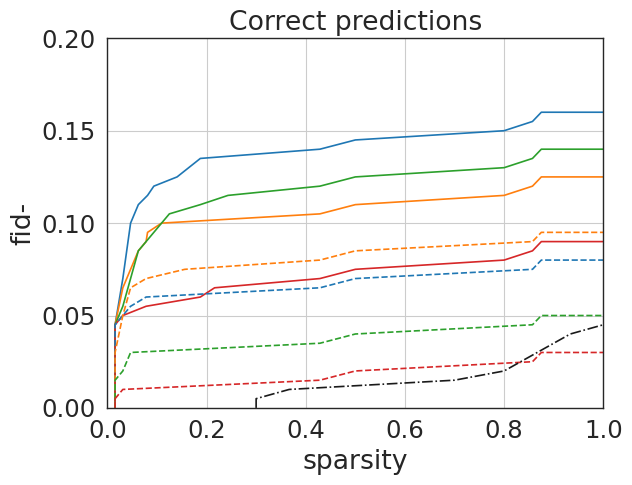

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_best_e['sparsity'], results_cody_1_best_e['explanation rate'], color='tab:blue')
ax.plot(results_cody_recent_e['sparsity'], results_cody_recent_e['explanation rate'], color='tab:orange')
ax.plot(results_cody_random_e['sparsity'], results_cody_random_e['explanation rate'], color='tab:green')
ax.plot(results_cody_closest_e['sparsity'], results_cody_closest_e['explanation rate'], color='tab:red')

ax.plot(results_greedy_1_best_e['sparsity'], results_greedy_1_best_e['explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_recent_e['sparsity'], results_greedy_recent_e['explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_e['sparsity'], results_greedy_random_e['explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_closest_e['sparsity'], results_greedy_closest_e['explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_e['sparsity'], tgnnexplainer_e['explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.2])

ax.set_title('Correct predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_wiki.tex')

plt.savefig('../plots/svg/fid_spar_wiki.svg')

plt.show()

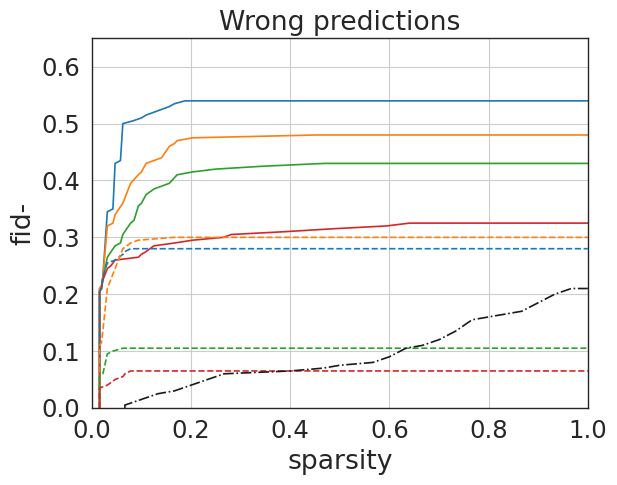

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_best_w_e['sparsity'], results_cody_1_best_w_e['explanation rate'], color='tab:blue')
ax.plot(results_cody_recent_w_e['sparsity'], results_cody_recent_w_e['explanation rate'], color='tab:orange')
ax.plot(results_cody_random_w_e['sparsity'], results_cody_random_w_e['explanation rate'], color='tab:green')
ax.plot(results_cody_closest_w_e['sparsity'], results_cody_closest_w_e['explanation rate'], color='tab:red')

ax.plot(results_greedy_1_best_w_e['sparsity'], results_greedy_1_best_w_e['explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_recent_w_e['sparsity'], results_greedy_recent_w_e['explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_w_e['sparsity'], results_greedy_random_w_e['explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_closest_w_e['sparsity'], results_greedy_closest_w_e['explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_w_e['sparsity'], tgnnexplainer_w_e['explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.65])

ax.set_title('Wrong predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_wiki_wrong.tex')

plt.savefig('../plots/svg/fid_spar_wiki_wrong.svg')

plt.show()

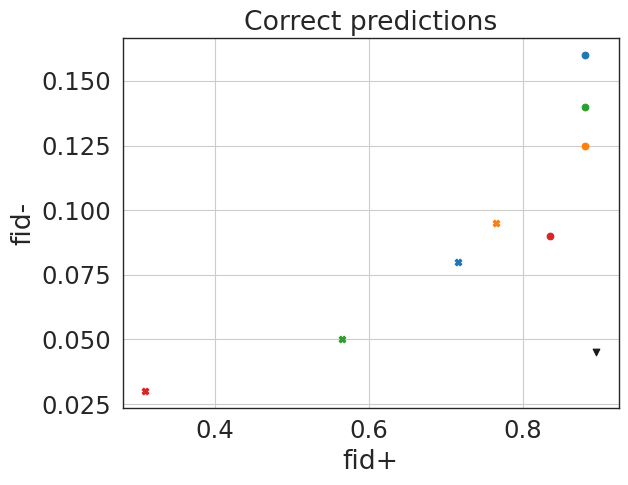

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in correct_predictions.iterrows():
    ax.scatter(row['fidelity_plus'], row['fidelity_minus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Correct predictions')

plt.xlabel('fid+')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_plus_minus_wiki.tex')

plt.savefig('../plots/svg/fid_plus_minus_wiki.svg')

plt.show()

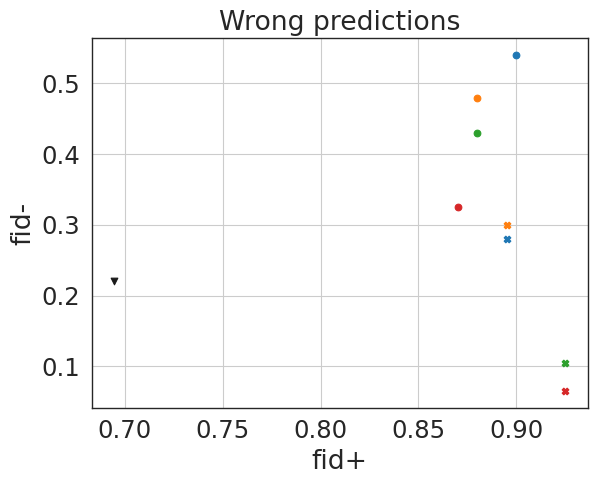

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in wrong_predictions.iterrows():
    ax.scatter(row['fidelity_plus'], row['fidelity_minus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Wrong predictions')

plt.xlabel('fid+')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.get_tikz_code()

tikzplotlib.save('../plots/fid_plus_minus_wiki_wrong.tex')

plt.savefig('../plots/svg/fid_plus_minus_wiki_wrong.svg')

plt.show()

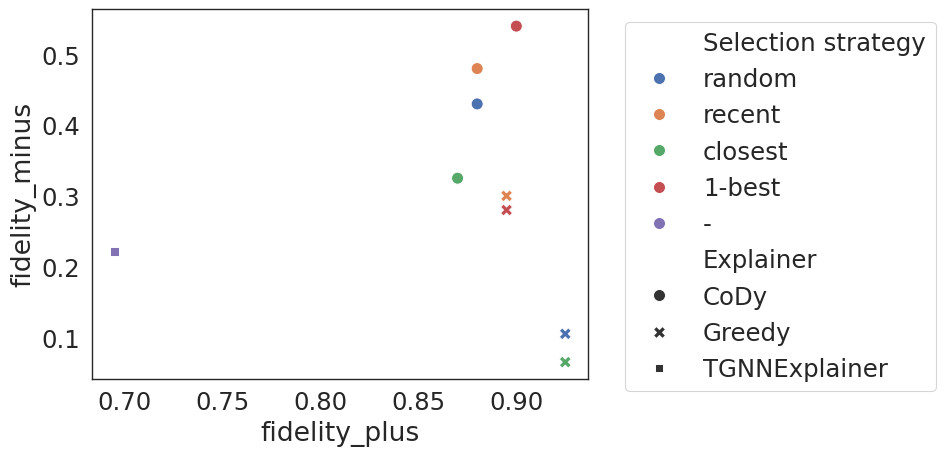

In [19]:
sns.scatterplot(data=wrong_predictions, x='fidelity_plus', y='fidelity_minus', hue='Selection strategy', style='Explainer', s=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#tikzplotlib.save('../plots/sns_test.tex')

plt.savefig('../plots/svg/fidelity_scatter.svg')

### 2.2. Runtime

/home/daniel/miniconda3/envs/analysis/lib/python3.9/site-packages/tikzplotlib/_hatches.py:65: UserWarning: tikzplotlib: Hatch '////' cannot be rendered. Only single character hatches are supported, e.g., {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Hatch '/' will be used.
  warnings.warn(


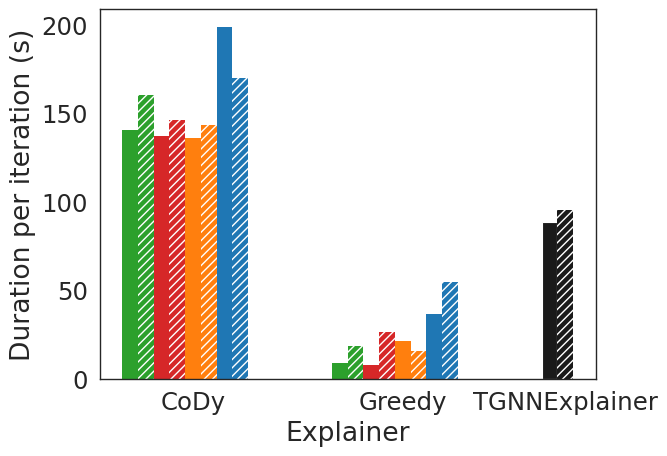

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(2)

width = 0.075
multiplier = 0


for selection_strategy in [selection_strategy for selection_strategy in selection_strategy_mapping.keys() if selection_strategy != '-']:
    offset = width * multiplier
    durations = correct_predictions[correct_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], linewidth=0)
    multiplier += 1
    
    offset = width * multiplier
    durations = wrong_predictions[wrong_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], hatch='////', linewidth=0)
    multiplier += 1

ax.bar(2, tgnnex['total_duration'].mean()/1000000000, width, color='k')
ax.bar(2 + width, tgnnex_w['total_duration'].mean()/1000000000, width, color='k', hatch='////', linewidth=0)

ax.set_xticks((0.3, 1.3, 2.075), ('CoDy', 'Greedy', 'TGNNExplainer'))
ax.set_ylabel('Duration per iteration (s)')
ax.set_xlabel('Explainer')

import tikzplotlib

tikzplotlib.save('../plots/duration_wiki.tex')

plt.savefig('../plots/svg/duration_wiki.svg')
    
plt.show()

### 2.3. Fidelity over Iterations

In [21]:
# Only evaluate for UCI dataset

## 3. Tabular Analysis

### 3.1. Performance Overview

In [16]:
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all', 'characterization_score']].to_csv('../tables/wiki_correct.csv')
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all', 'characterization_score']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,sparsity,sparsity_all,characterization_score
0,CoDy,random,0.880,0.140,0.173021,0.070147,0.241569
1,CoDy,recent,0.880,0.125,0.168547,0.064098,0.218905
2,CoDy,closest,0.835,0.090,0.228579,0.061550,0.162486
3,CoDy,1-best,0.880,0.160,0.151697,0.073664,0.270769
0,Greedy,random,0.565,0.050,0.283259,0.041495,0.091870
1,Greedy,recent,0.765,0.095,0.171288,0.057530,0.169012
2,Greedy,closest,0.310,0.030,0.451265,0.041878,0.054706
3,Greedy,1-best,0.715,0.080,0.185826,0.054149,0.143899
0,TGNNExplainer,-,0.895,0.045,0.755556,0.326611,0.085691


In [17]:
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all', 'characterization_score']].to_csv('../tables/wiki_wrong.csv')
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'sparsity', 'sparsity_all', 'characterization_score']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,sparsity,sparsity_all,characterization_score
0,CoDy,random,0.880000,0.430000,0.058371,0.069587,0.577710
1,CoDy,recent,0.880000,0.480000,0.050975,0.055676,0.621176
2,CoDy,closest,0.870000,0.325000,0.070175,0.073456,0.473222
3,CoDy,1-best,0.900000,0.540000,0.038804,0.058411,0.675000
0,Greedy,random,0.925000,0.105000,0.024662,0.018243,0.188592
1,Greedy,recent,0.895000,0.300000,0.035008,0.031041,0.449372
2,Greedy,closest,0.925000,0.065000,0.033974,0.023874,0.121465
3,Greedy,1-best,0.895000,0.280000,0.021771,0.024300,0.426553
0,TGNNExplainer,-,0.694737,0.221053,0.581746,0.432799,0.335390


### 3.2. Export Scatter

In [24]:
correct_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
wrong_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

correct_predictions[['meta', 'fidelity_minus', 'fidelity_plus']].to_csv('../tables/wiki_fid_correct.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])
wrong_predictions[['meta', 'fidelity_minus', 'fidelity_plus']].to_csv('../tables/wiki_fid_wrong.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])

In [25]:
correct_predictions['correct'] = True
wrong_predictions['correct'] = False

In [26]:
pd.concat((correct_predictions, wrong_predictions)).to_excel('../tables/wiki_full.xlsx')

In [28]:
tgnnex['total_duration'].mean()/1000000000

88.539939870335

In [29]:
pd.concat((results_cody_1_best_w_e, tgnnexplainer_w_e, results_greedy_recent_w_e)).to_excel('../tables/wiki_expanded_wrong.xlsx')

In [30]:
pd.concat((results_cody_1_best_e, tgnnexplainer_e, results_greedy_recent_e)).to_excel('../tables/wiki_expanded_correct.xlsx')

### 3.3. Runtime Overview

In [31]:
correct_runtime = correct_predictions[['Explainer', 'Selection strategy', 'avg_oracle_calls', 'initialisation (s)', 'explanation (s)', 'oracle calls (s)', 'Duration']]
correct_runtime['oracle_calls_pct'] = correct_runtime['oracle calls (s)']/correct_runtime['Duration']
correct_runtime['explanation_pct'] = correct_runtime['explanation (s)']/correct_runtime['Duration']

/tmp/ipykernel_21596/1218401292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_runtime['oracle_calls_pct'] = correct_runtime['oracle calls (s)']/correct_runtime['Duration']
/tmp/ipykernel_21596/1218401292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_runtime['explanation_pct'] = correct_runtime['explanation (s)']/correct_runtime['Duration']


In [32]:
correct_runtime

,Explainer,Selection strategy,avg_oracle_calls,initialisation (s),explanation (s),oracle calls (s),Duration,oracle_calls_pct,explanation_pct
0,CoDy,random,284.520,0.004102,0.497026,139.654840,140.151865,0.996454,0.003546
1,CoDy,recent,284.850,0.000636,0.444817,135.550671,135.995489,0.996729,0.003271
2,CoDy,closest,284.520,0.007803,0.768499,136.033086,136.801585,0.994382,0.005618
3,CoDy,1-best,339.895,0.055456,0.573901,197.975049,198.548951,0.997110,0.002890
0,Greedy,random,23.150,0.000123,0.010581,8.863214,8.873795,0.998808,0.001192
1,Greedy,recent,32.300,0.000082,0.010331,21.278860,21.289191,0.999515,0.000485
2,Greedy,closest,23.350,0.000081,0.010587,7.811075,7.821661,0.998646,0.001354
3,Greedy,1-best,80.470,16.066104,0.028639,36.463951,36.492590,0.999215,0.000785
0,TGNNExplainer,-,13112.615,0.060199,12.686673,75.793068,88.539940,0.856033,0.143288


In [33]:
wrong_runtime = wrong_predictions[['Explainer', 'Selection strategy', 'avg_oracle_calls', 'initialisation (s)', 'explanation (s)', 'oracle calls (s)', 'Duration']]
wrong_runtime['oracle_calls_pct'] = wrong_runtime['oracle calls (s)']/wrong_runtime['Duration']
wrong_runtime['explanation_pct'] = wrong_runtime['explanation (s)']/wrong_runtime['Duration']

/tmp/ipykernel_21596/3751994185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_runtime['oracle_calls_pct'] = wrong_runtime['oracle calls (s)']/wrong_runtime['Duration']
/tmp/ipykernel_21596/3751994185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_runtime['explanation_pct'] = wrong_runtime['explanation (s)']/wrong_runtime['Duration']


In [43]:
wrong_runtime

,Explainer,Selection strategy,avg_oracle_calls,initialisation (s),explanation (s),oracle calls (s),Duration,oracle_calls_pct,explanation_pct
0,CoDy,random,237.155000,0.001562,0.679613,159.379285,160.058897,0.995754,0.004246
1,CoDy,recent,234.000000,0.000630,0.589078,142.487038,143.076116,0.995883,0.004117
2,CoDy,closest,236.260000,0.003577,3.266178,142.875097,146.141274,0.977651,0.022349
3,CoDy,1-best,272.515000,0.053424,0.740807,168.865043,169.605850,0.995632,0.004368
0,Greedy,random,18.550000,0.000083,0.008346,18.490892,18.499238,0.999549,0.000451
1,Greedy,recent,24.650000,0.000080,0.008460,15.908738,15.917197,0.999468,0.000532
2,Greedy,closest,22.350000,0.000080,0.014149,26.575119,26.589268,0.999468,0.000532
3,Greedy,1-best,69.355000,22.243561,0.024661,54.485956,54.510617,0.999548,0.000452
0,TGNNExplainer,-,13498.736842,0.047031,15.299674,80.189203,95.535907,0.839362,0.160146


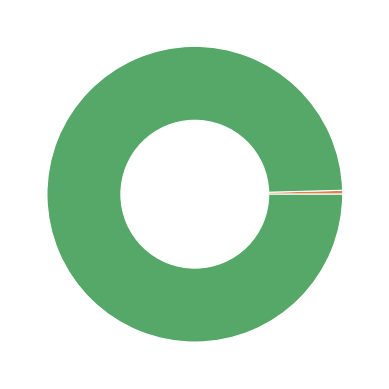

In [41]:
fig, ax = plt.subplots()
ax.pie([0.001562, 0.679613, 159.379285], wedgeprops=dict(width=0.5))
plt.show()

In [15]:
results = [tgnnex, greedy_random, greedy_closest, greedy_recent, greedy_1_best, cody_random, cody_closest, cody_recent, cody_1_best]
precisions = np.zeros((len(results), len(results)))
recalls = np.zeros((len(results), len(results)))
f1s = np.zeros((len(results), len(results)))
jaccard_similarities = np.zeros((len(results), len(results)))
aymaras = np.zeros((len(results), len(results)))
for index, result in enumerate(results):
    for inner_index, result_other in enumerate(results):
        precision, recall, f1, jaccard_similarity, aymara = calculate_similarity_scores(result, result_other)
        precisions[index][inner_index] = precision
        recalls[index][inner_index] = recall
        f1s[index][inner_index] = f1
        jaccard_similarities[index][inner_index] = jaccard_similarity
        aymaras[index][inner_index] = aymara

In [16]:
results_w = [tgnnex_w, greedy_random_w, greedy_closest_w, greedy_recent_w, greedy_1_best_w, cody_random_w, cody_closest_w, cody_recent_w, cody_1_best_w]
precisions_w = np.zeros((len(results_w), len(results_w)))
recalls_w = np.zeros((len(results_w), len(results_w)))
f1s_w = np.zeros((len(results_w), len(results_w)))
jaccard_similarities_w = np.zeros((len(results_w), len(results_w)))
for index, result in enumerate(results_w):
    for inner_index, result_other in enumerate(results_w):
        precision, recall, f1, jaccard_similarity = calculate_similarity_scores(result, result_other)
        precisions_w[index][inner_index] = precision
        recalls_w[index][inner_index] = recall
        f1s_w[index][inner_index] = f1
        jaccard_similarities_w[index][inner_index] = jaccard_similarity

In [17]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-closest', 'GreedyCF-recent', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-closest', 'CoDy-recent', 'CoDy-1-best']

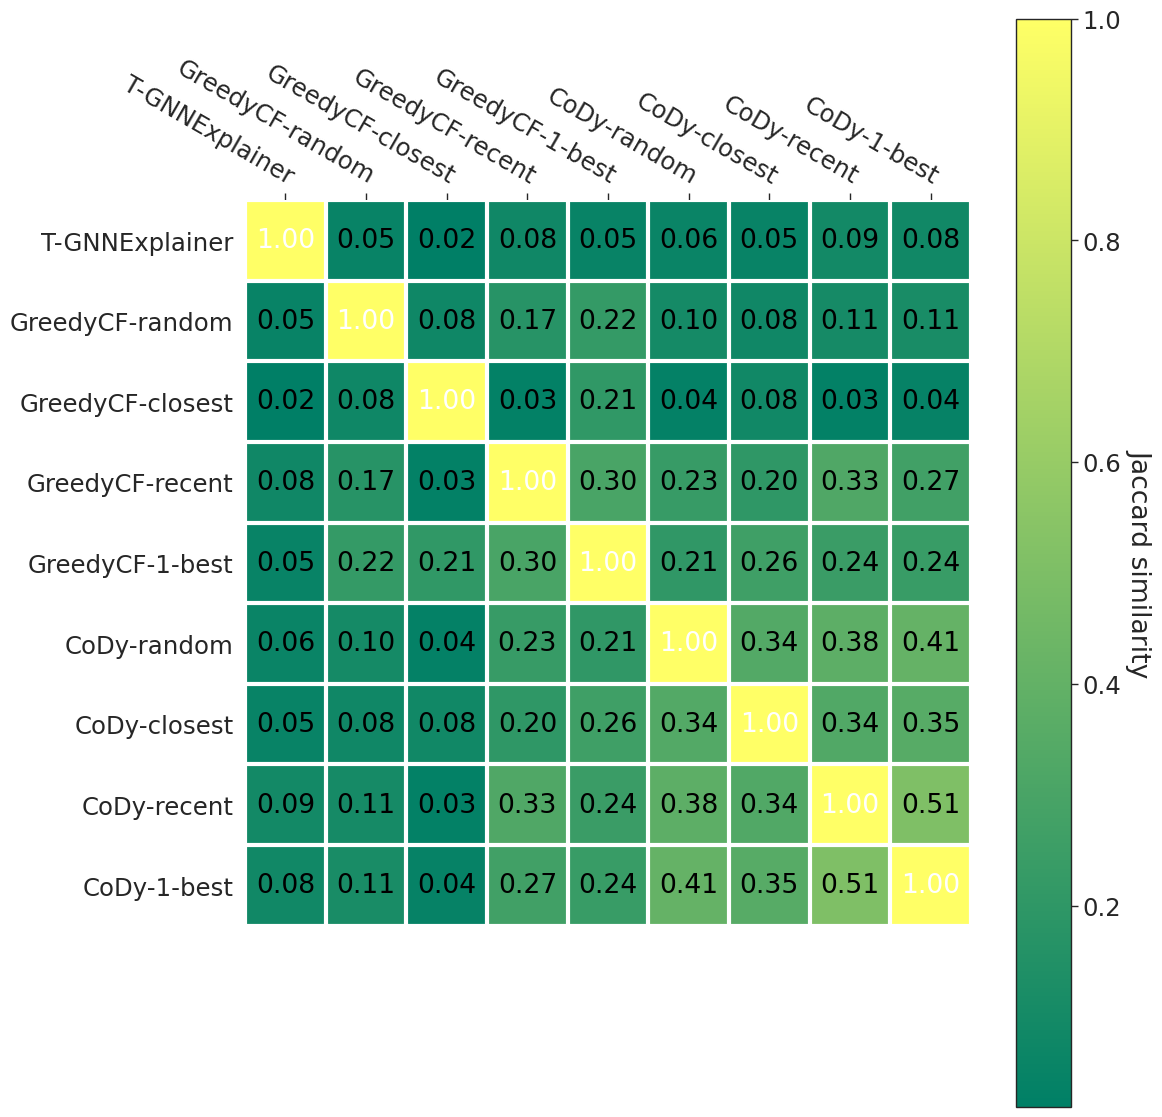

In [30]:
fig, ax = plt.subplots(figsize=(12,12))

im, cbar = heatmap(jaccard_similarities, labels, labels, ax=ax, cmap="summer", cbarlabel="Jaccard similarity")
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

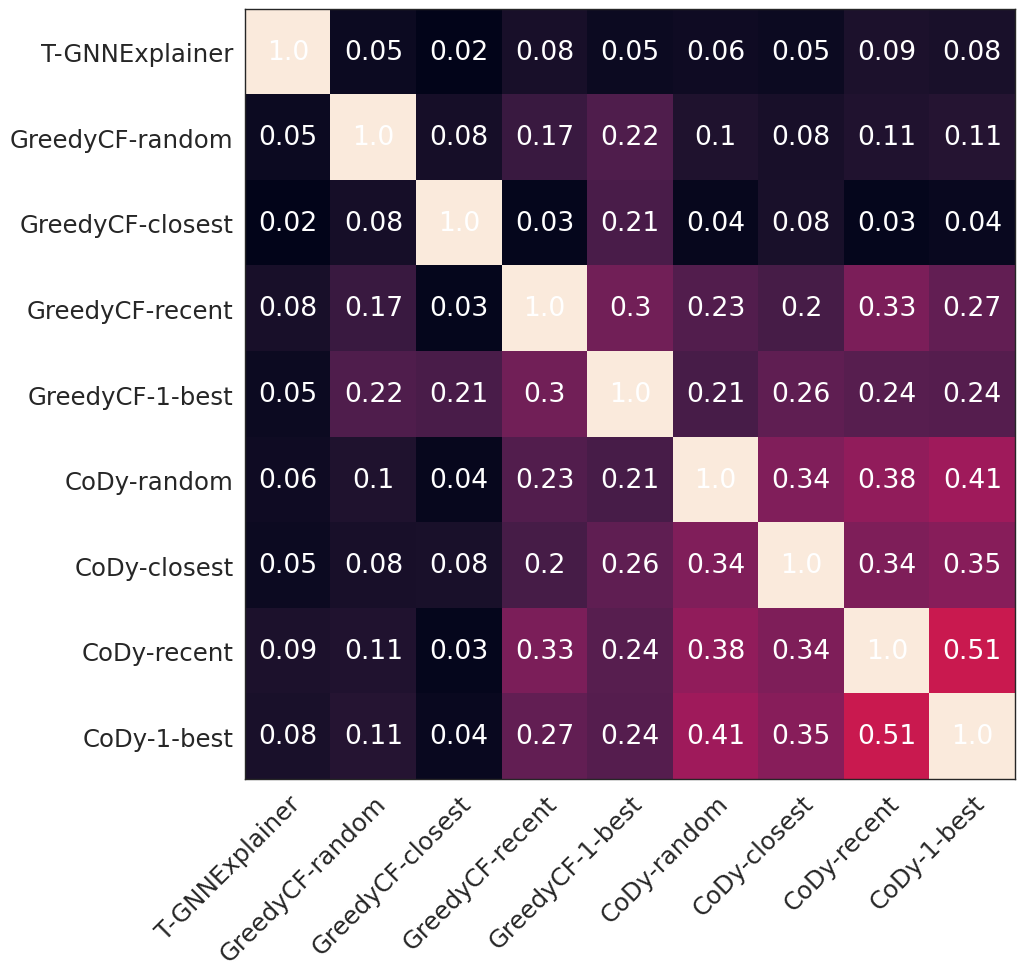

In [17]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-closest', 'GreedyCF-recent', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-closest', 'CoDy-recent', 'CoDy-1-best']

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(jaccard_similarities)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, np.round(jaccard_similarities[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

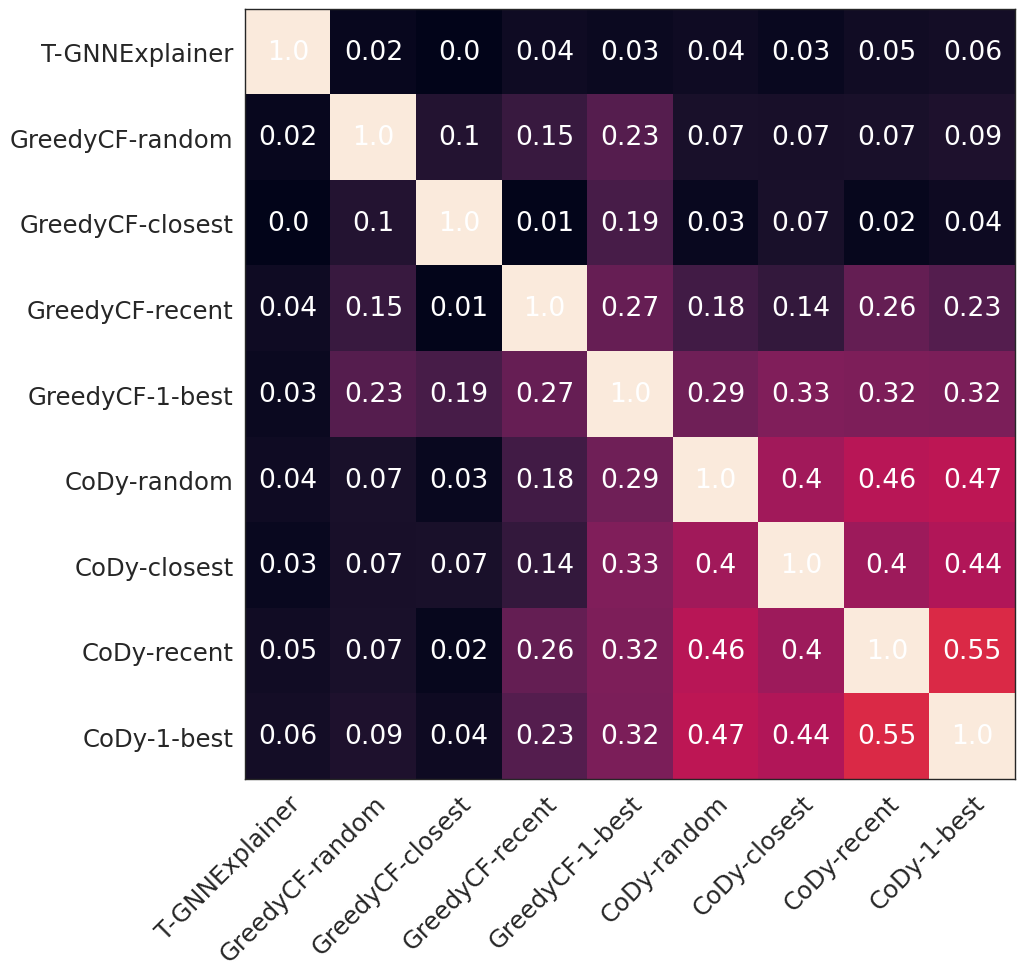

In [23]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-closest', 'GreedyCF-recent', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-closest', 'CoDy-recent', 'CoDy-1-best']

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(jaccard_similarities_w)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, np.round(jaccard_similarities_w[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

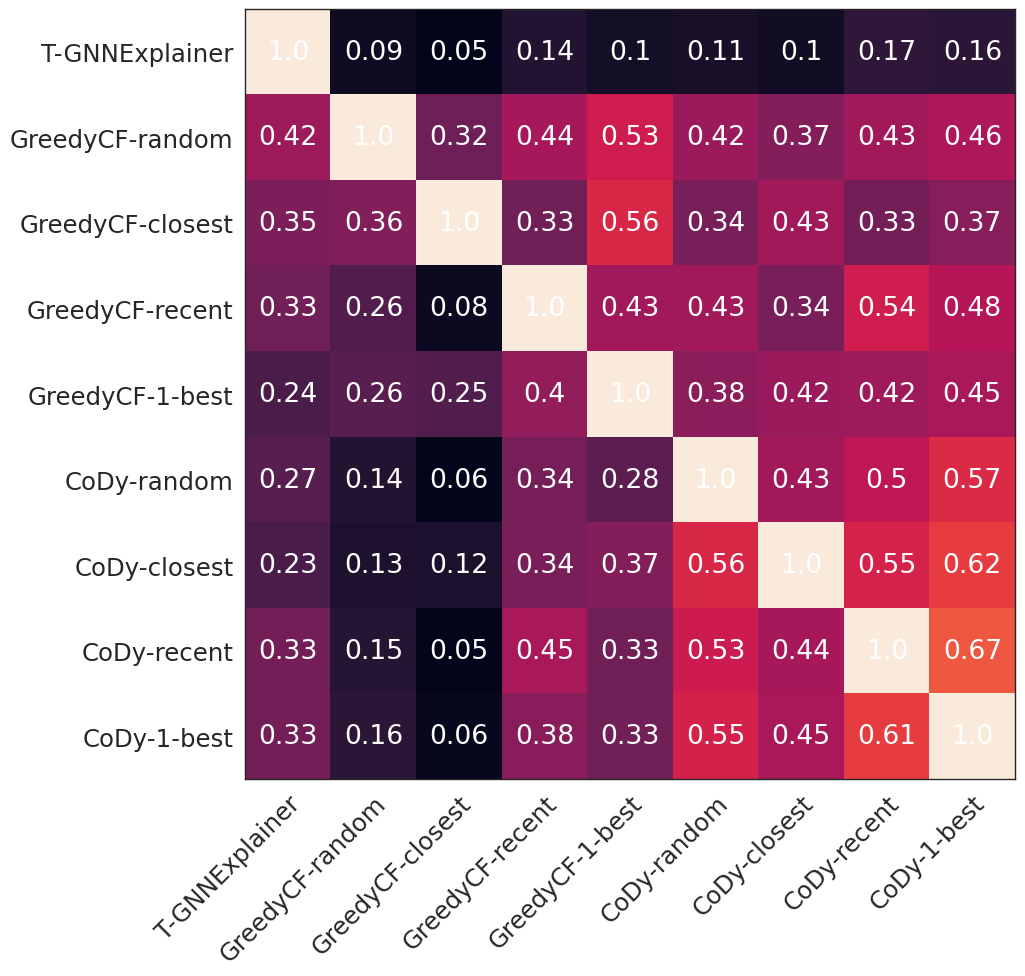

In [20]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-closest', 'GreedyCF-recent', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-closest', 'CoDy-recent', 'CoDy-1-best']

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(precisions)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, np.round(precisions[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

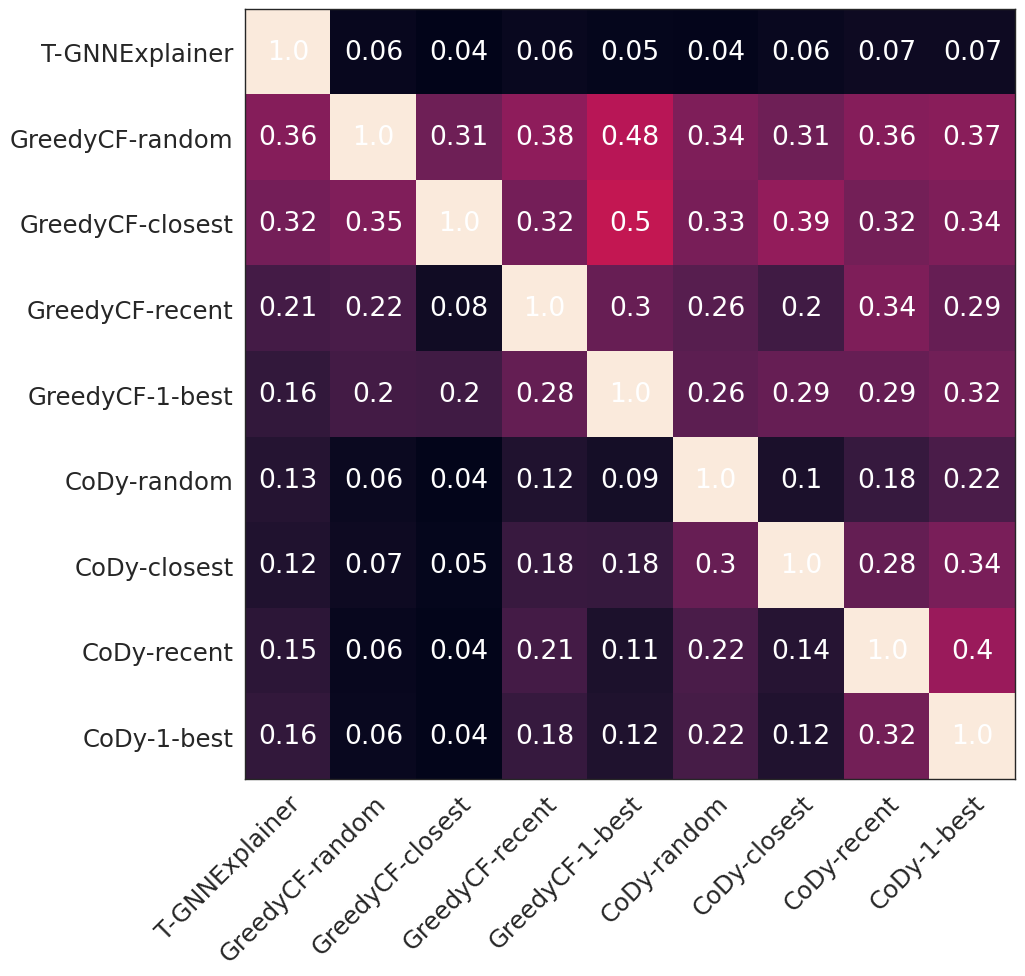

In [18]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-closest', 'GreedyCF-recent', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-closest', 'CoDy-recent', 'CoDy-1-best']

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(aymaras)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, np.round(aymaras[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

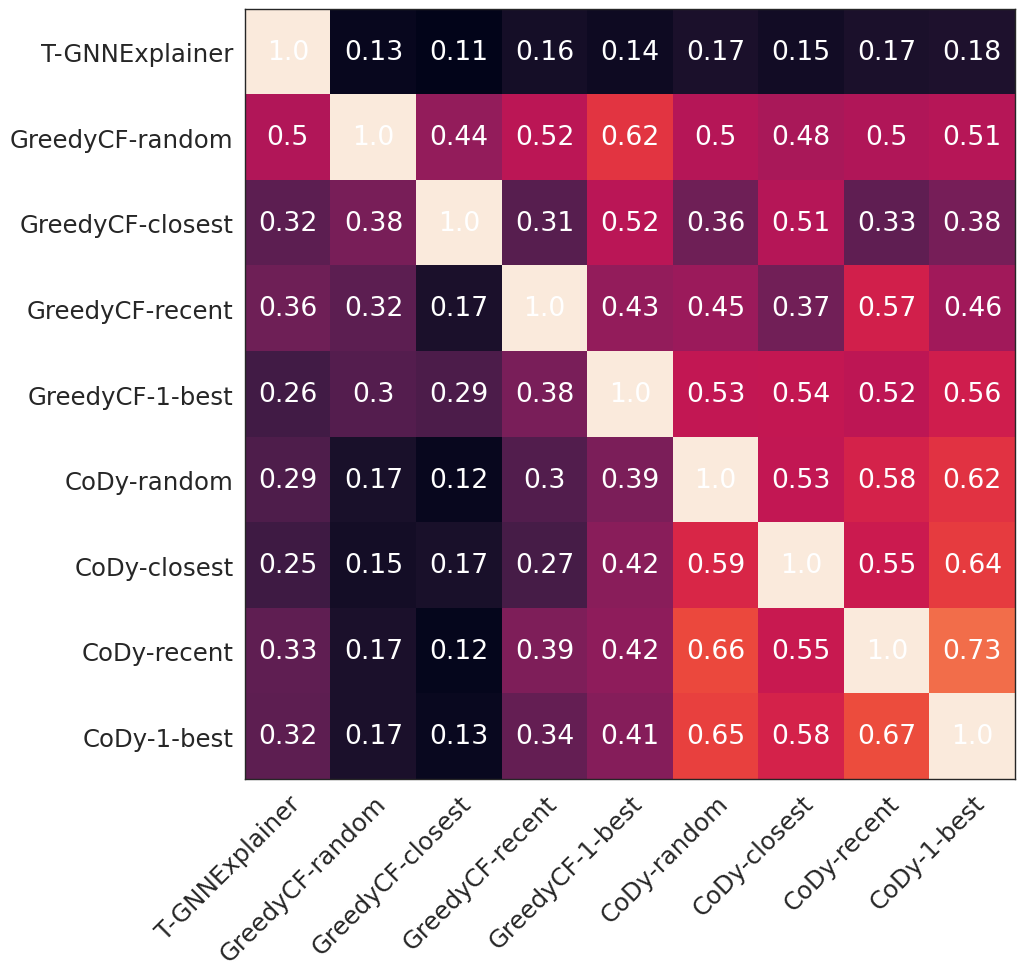

In [24]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-closest', 'GreedyCF-recent', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-closest', 'CoDy-recent', 'CoDy-1-best']

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(precisions_w)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, np.round(precisions_w[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

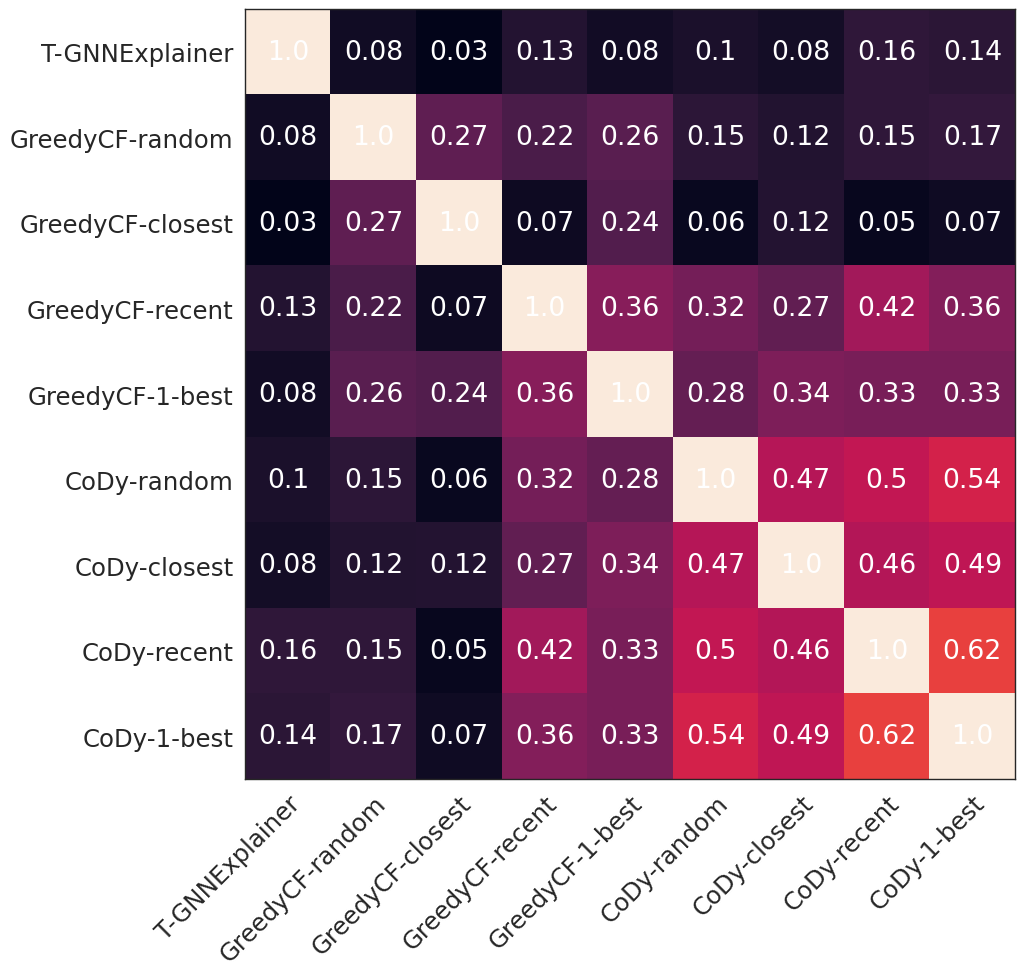

In [21]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-closest', 'GreedyCF-recent', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-closest', 'CoDy-recent', 'CoDy-1-best']

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(f1s)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, np.round(f1s[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

In [76]:
np.isin()

1

In [79]:
a = np.array([1,2,3])
b = np.array([1,4,5, 6])

~np.isin(b, a)

array([False,  True,  True,  True])

In [80]:
np.sum(np.isin(a,b))

1

In [81]:
np.sum(~np.isin(a, b))

2

In [15]:
calculate_similarity_scores(cody_recent, cody_1_best)

(0.6674816018557769,
 0.6110444140469469,
 0.6152266711279285,
 0.5057095048211799)

In [16]:
calculate_similarity_scores(cody_1_best, cody_recent)

(0.6110444140469469,
 0.6674816018557769,
 0.6152266711279285,
 0.5057095048211799)